<a href="https://colab.research.google.com/github/Epilef86/DNC/blob/main/Regress%C3%A3o_DataSet_Criado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Criando meu próprio dataset

In [21]:
dataset ={"tempo":[1,3,4,4,6,8,10,10,11,13],
          "vendas":[91,110,106,116,119,129,139,143,138,159]    
}

dataset = pd.DataFrame(dataset) 
dataset.head()  

,tempo,vendas
0,1,91
1,3,110
2,4,106
3,4,116
4,6,119


Analisando como se comporta a reta no gráfico de dispersão. Para plotar uma reta linear, usaremos ".lmplot"

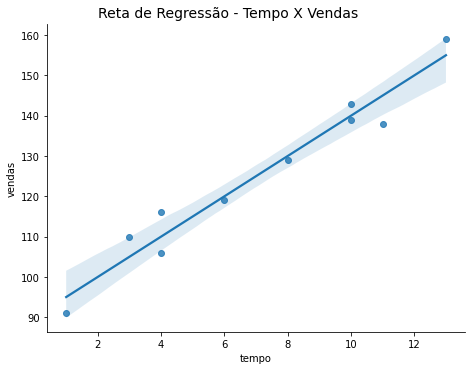

In [29]:
ax = sns.lmplot(x="tempo", y="vendas", data=dataset)

#Para alterar o tamanho da figura:
ax.fig.set_size_inches(7,5)
#Colocando um subtitulo
ax.fig.suptitle("Reta de Regressão - Tempo X Vendas", fontsize=14, y=1.02)
plt.show()

Analisando a correlação. Lembradno que uma boa correlação é > 7

In [30]:
dataset.corr()

,tempo,vendas
tempo,1.000000,0.976883
vendas,0.976883,1.000000


Estimando a variável target, para isso é necessário importar a biblioteca estatistica chamada statsmodels

In [31]:
import statsmodels.api as sm

In [33]:
y = dataset.vendas

x = sm.add_constant(dataset.tempo)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [35]:
resultado_regressao = sm.OLS(y,x).fit()


summary() serve para plotar a tabela abaixo

In [37]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                 vendas   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     167.1
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           1.22e-06
Time:                        15:21:20   Log-Likelihood:                -28.355
No. Observations:                  10   AIC:                             60.71
Df Residuals:                       8   BIC:                             61.32
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.0000      3.075     29.265      0.0

/usr/local/lib/python3.8/dist-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


R² é o coeficiente de determinação que pode ser calculado pelo quadrado de coeficiente de correlação. Quanto maior o R² melhor o modelo de regressão, ou seja melhor acurácia. R² varia de 0 a 1. R² acima de -,5 já indicam bom ajuste. Expressa o quanto o modelo consegue explicar o comportamento das variáveis.Observe que R-squared(R quadrado) consegue prever em 95.40% a variabilidade das duas variáveis(x,y). O intercepte é a const = 90.00 e o tempo é 5.00, ou seja
y = b + ax = (90 + 5x)

Criando uma coluna que vai ser o meu previsto

In [38]:
dataset["y_previsto"] = resultado_regressao.predict()
dataset.head()

,tempo,vendas,y_previsto
0,1,91,95.0
1,3,110,105.0
2,4,106,110.0
3,4,116,110.0
4,6,119,120.0


Verificar quanto meu dataset criado está errando

In [39]:
from statsmodels.tools import data
dataset["residuo"] = dataset["y_previsto"] - dataset["vendas"]
dataset.head()

,tempo,vendas,y_previsto,residuo
0,1,91,95.0,4.0
1,3,110,105.0,-5.0
2,4,106,110.0,4.0
3,4,116,110.0,-6.0
4,6,119,120.0,1.0
